# Principal Component Analysis (PCA)

Using the Boston dataset from scikit-learn to perform SVD on a normalized dataset in Python.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import the data

In [2]:
#import data from scikit-learn packages

from sklearn.datasets import load_boston        #after typing load click tab to see all datasets avialable in scikit learn

In [3]:
#assign to a variable
boston=load_boston()

In [4]:
#check the type
type(boston)

sklearn.utils.Bunch

In [5]:
#the keys
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
#print DESCR
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
print(boston['feature_names'])
print('\n')
print(boston['filename'])
print('\n')
#print(boston['target'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


C:\Users\kafub\anaconda3\lib\site-packages\sklearn\datasets\data\boston_house_prices.csv




In [8]:
df_boston=pd.DataFrame(boston['data'],columns=boston['feature_names'])
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [9]:
#or
X, _=load_boston(return_X_y=True)
X =pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


<AxesSubplot:xlabel='6', ylabel='7'>

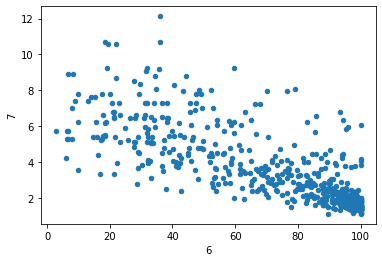

In [10]:
#let see the scatter plot of some data
X.plot(kind='scatter',x=6,y=7)

From this the mean isnot at the origin, the mean of thif data is between 60-80. For PCA mean should be at 0. 

The std for 6 is spans form 0 two 100 and for number 7 spans from 2 two 10. this big std have a negative effect on the svd

So, first shift the dataset to the orgin and normalize it, then all the std have a value one

In [11]:
#see the mean, std
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# step1: Normlize the data

First shift the data: To shift the data to the origin, subtract the mean form the original dataset, X-mean

Normlize: To normalize divided by the std         (X-mu)/sigma

In [12]:
#mean and std
mu=X.mean()
sigma=X.std()

Xnorm=(X-mu)/sigma
Xnorm

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.412820,-0.487240,0.115624,-0.272329,0.157968,0.438881,0.018654,-0.625178,-0.981871,-0.802418,1.175303,0.386834,-0.417734
502,-0.414839,-0.487240,0.115624,-0.272329,0.157968,-0.234316,0.288648,-0.715931,-0.981871,-0.802418,1.175303,0.440616,-0.500355
503,-0.413038,-0.487240,0.115624,-0.272329,0.157968,0.983986,0.796661,-0.772919,-0.981871,-0.802418,1.175303,0.440616,-0.982076
504,-0.407361,-0.487240,0.115624,-0.272329,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,1.175303,0.402826,-0.864446


<AxesSubplot:xlabel='6', ylabel='7'>

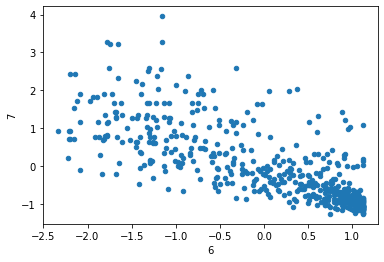

In [13]:
Xnorm.plot(kind='scatter',x=6,y=7)

The graph qualitatvly the same, but the mean shift to 0.00

In [14]:
Xnorm.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,8.326673e-17,3.466704e-16,-3.016965e-15,3.999875e-16,3.563575e-15,-1.149882e-14,-1.158274e-15,7.308603e-16,-1.068535e-15,6.534079e-16,-1.084420e-14,8.117354e-15,-6.494585e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.193669e-01,-4.872402e-01,-1.556302e+00,-2.723291e-01,-1.464433e+00,-3.876413e+00,-2.333128e+00,-1.265817e+00,-9.818712e-01,-1.312691e+00,-2.704703e+00,-3.903331e+00,-1.529613e+00
25%,-4.105633e-01,-4.872402e-01,-8.668328e-01,-2.723291e-01,-9.121262e-01,-5.680681e-01,-8.366200e-01,-8.048913e-01,-6.373311e-01,-7.668172e-01,-4.875567e-01,2.048688e-01,-7.986296e-01
50%,-3.902803e-01,-4.872402e-01,-2.108898e-01,-2.723291e-01,-1.440749e-01,-1.083583e-01,3.170678e-01,-2.790473e-01,-5.224844e-01,-4.642132e-01,2.745872e-01,3.808097e-01,-1.810744e-01
75%,7.389247e-03,4.872402e-02,1.014995e+00,-2.723291e-01,5.980871e-01,4.822906e-01,9.059016e-01,6.617161e-01,1.659603e+00,1.529413e+00,8.057784e-01,4.332223e-01,6.024226e-01
max,9.924110e+00,3.800473e+00,2.420170e+00,3.664771e+00,2.729645e+00,3.551530e+00,1.116390e+00,3.956602e+00,1.659603e+00,1.796416e+00,1.637208e+00,4.406159e-01,3.545262e+00


Here the mean almost zero and std equal to 1.000

In [15]:
# from sklearn to normaliz the data
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()
scaler.fit(X)
scaled_data=scaler.transform(X)
datanorm=pd.DataFrame(scaled_data)
datanorm

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


<AxesSubplot:xlabel='6', ylabel='7'>

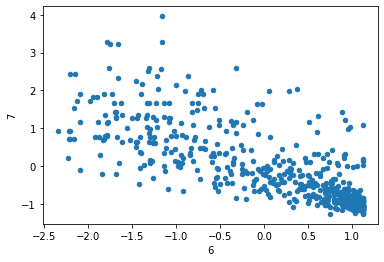

In [17]:
datanorm.plot(kind='scatter',x=6,y=7)

# step2: Perform SVD on the normalized data

In [18]:
from scipy.linalg import svd

In [19]:
U,s,VT=svd(Xnorm,full_matrices=False)

# Answer check
print(U.shape, sigma.shape, VT.shape)
print(type(U))

(506, 13) (13,) (13, 13)
<class 'numpy.ndarray'>


In [20]:
#print different components
print('U:',U)
print('\n')
print('Singular array',s)
print('\n')
print('V^{T}',VT)

U: [[-0.03768541  0.02870799  0.01367659 ... -0.0034015  -0.00210036
   0.06455918]
 [-0.02617223  0.02198218 -0.02772461 ... -0.06605119  0.0135914
  -0.01247514]
 [-0.03725976  0.02226641  0.00666482 ... -0.0502547  -0.01440486
  -0.00247349]
 ...
 [-0.00560999  0.04289776 -0.01629491 ...  0.01192123 -0.03046395
   0.01102053]
 [-0.00485852  0.03866887 -0.02334796 ...  0.00896877 -0.03259635
   0.00959102]
 [-0.00225942  0.02829453 -0.05164001 ...  0.01899881 -0.02514495
   0.00347668]]


Singular array [55.62426321 26.90360453 25.05037764 20.81046443 20.53246327 18.22060986
 16.44247012 14.14316598 11.82608902 10.54609414  9.69212337  9.24651299
  5.66323022]


V^{T} [[ 0.2509514  -0.25631454  0.34667207  0.00504243  0.34285231 -0.18924257
   0.3136706  -0.32154387  0.31979277  0.33846915  0.20494226 -0.20297261
   0.30975984]
 [-0.31525237 -0.3233129   0.11249291  0.45482914  0.21911553  0.14933154
   0.31197778 -0.34907    -0.27152094 -0.23945365 -0.30589695  0.23855944
  -0.07432

In [21]:
print(s)

[55.62426321 26.90360453 25.05037764 20.81046443 20.53246327 18.22060986
 16.44247012 14.14316598 11.82608902 10.54609414  9.69212337  9.24651299
  5.66323022]


# we can check the decomposition is correct

In [22]:
sigma=np.diag(s)
V=VT.T
U @ sigma @ V.T

array([[-0.41936693,  0.28454827, -1.28663623, ..., -1.45755797,
         0.44061589, -1.07449897],
       [-0.41692667, -0.48724019, -0.59279438, ..., -0.3027945 ,
         0.44061589, -0.49195252],
       [-0.416929  , -0.48724019, -0.59279438, ..., -0.3027945 ,
         0.39603507, -1.20753241],
       ...,
       [-0.41303783, -0.48724019,  0.11562398, ...,  1.17530274,
         0.44061589, -0.98207574],
       [-0.40736095, -0.48724019,  0.11562398, ...,  1.17530274,
         0.40282626, -0.86444617],
       [-0.41458988, -0.48724019,  0.11562398, ...,  1.17530274,
         0.44061589, -0.66839688]])

In [23]:
print(s)
print('\n')
print(sigma)

[55.62426321 26.90360453 25.05037764 20.81046443 20.53246327 18.22060986
 16.44247012 14.14316598 11.82608902 10.54609414  9.69212337  9.24651299
  5.66323022]


[[55.62426321  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.         26.90360453  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.         25.05037764  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.         20.81046443  0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.         20.53246327  0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.         18.22060986
   0.          0.          0.

In [24]:
sigma.shape

(13, 13)

In [25]:
pd.DataFrame(U @ sigma @ V.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.412820,-0.487240,0.115624,-0.272329,0.157968,0.438881,0.018654,-0.625178,-0.981871,-0.802418,1.175303,0.386834,-0.417734
502,-0.414839,-0.487240,0.115624,-0.272329,0.157968,-0.234316,0.288648,-0.715931,-0.981871,-0.802418,1.175303,0.440616,-0.500355
503,-0.413038,-0.487240,0.115624,-0.272329,0.157968,0.983986,0.796661,-0.772919,-0.981871,-0.802418,1.175303,0.440616,-0.982076
504,-0.407361,-0.487240,0.115624,-0.272329,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,1.175303,0.402826,-0.864446


In [26]:
Xnorm

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.412820,-0.487240,0.115624,-0.272329,0.157968,0.438881,0.018654,-0.625178,-0.981871,-0.802418,1.175303,0.386834,-0.417734
502,-0.414839,-0.487240,0.115624,-0.272329,0.157968,-0.234316,0.288648,-0.715931,-0.981871,-0.802418,1.175303,0.440616,-0.500355
503,-0.413038,-0.487240,0.115624,-0.272329,0.157968,0.983986,0.796661,-0.772919,-0.981871,-0.802418,1.175303,0.440616,-0.982076
504,-0.407361,-0.487240,0.115624,-0.272329,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,1.175303,0.402826,-0.864446


the two tables have the same results

In [27]:
np.allclose(Xnorm,U @ sigma @ V.T)  #True mean the comparesion is the same 

True

# We can recover the original data set from the decomposition

Calculate the X from the normalize equation

X = mu + sigma*Xnorm

In [28]:
pd.DataFrame(U @ sigma @ V.T)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.412820,-0.487240,0.115624,-0.272329,0.157968,0.438881,0.018654,-0.625178,-0.981871,-0.802418,1.175303,0.386834,-0.417734
502,-0.414839,-0.487240,0.115624,-0.272329,0.157968,-0.234316,0.288648,-0.715931,-0.981871,-0.802418,1.175303,0.440616,-0.500355
503,-0.413038,-0.487240,0.115624,-0.272329,0.157968,0.983986,0.796661,-0.772919,-0.981871,-0.802418,1.175303,0.440616,-0.982076
504,-0.407361,-0.487240,0.115624,-0.272329,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,1.175303,0.402826,-0.864446


In [29]:
mu.shape

(13,)

In [30]:
mu + sigma*pd.DataFrame( U @ sigma @ V.T)   #check it

ValueError: Unable to coerce to DataFrame, shape must be (506, 13): given (13, 13)

In [ ]:
pwd

# Interpretation of PCA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#import data from scikit-learn packages

from sklearn.datasets import load_boston 

In [ ]:
#or
X, _=load_boston(return_X_y=True)
X =pd.DataFrame(X)
X

In [ ]:
# normalize the data
#mean and std
mu=X.mean()
sigma=X.std()

Xnorm=(X-mu)/sigma
Xnorm

In [ ]:
# perform SVD on the normalize data

from scipy.linalg import svd

In [ ]:
U,s,Vt=svd(Xnorm,full_matrices=False)

# Answer check
print(U.shape, sigma.shape, Vt.shape)
print(type(U))

In [ ]:
U

In [ ]:
#converting sigma

Sigma = np.diag(s)
V=Vt.T

# Project the data into 4 dimenstions 

formula: Xrr=Ur*Sigmar

In [ ]:
r =4

Ur=U[:,:r]
Sigmar=Sigma[:r,:r]

Xrr =Ur @ Sigmar
Xrr 

#lets throw to Xrr to dataframe

xrr =pd.DataFrame(Xrr)
xrr

In [ ]:
print(type(Xrr))
print('\n')
print(Xrr.shape)

# Incorprate a new data

Xrr =Xrd*Vr

In [ ]:
newhome=[0.044,70,2.24,0.0,0.4,6.87,47.4,7.82,5.0,358,14.8,390.86,6.07]

In [ ]:
#first normalize the data
newhome_norm=(newhome-mu)/sigma

#calculated the newhome projected value
newhome_proj= newhome_norm @ V[:,:r]
newhome_proj

In [ ]:
#lets append to the projected data exist Xrr

Xrr.loc[len(Xrr)]=newhome_proj

Xrr

# PCA

In [ ]:
# our data should be scaled data
Xnorm #but not in dataframe 
#or
scaled_data

In [ ]:
#import pca from sklearn
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=2,svd_solver='auto',iterated_power='auto')
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

In [ ]:
#check the dimensionality now
print(scaled_data.shape)
print('\n')
print(x_pca.shape)

In [ ]:
#to plot
df=pd.DataFrame(x_pca)

In [ ]:
df.plot(kind='scatter',x =0,y=1, c =boston['target'], cmap='plasma')